### Importing Libraries 

In [ ]:
import lightgbm as lgbm

import pandas as pd
import numpy as np

import sys, os

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
import seaborn as sns
import matplotlib

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

In [2]:
np.random.seed(72)

### Confusion Matrix

In [3]:
def confusion(true,pred):
    confusion_matrix = ConfusionMatrix(true, pred)
    confusion_matrix.plot(normalized=True)
    plt.set_cmap('Greens')
    plt.rcParams.update({'font.size': 12})
    plt.title('Overall accuracy %.3f%%' % (100*accuracy_score(true, pred)))

### Loading data for the accuracy and the Confusion Matrix Figure

In [4]:
df = pd.read_csv('Final_Features_REALTemp.csv').iloc[:, 1:]

In [5]:
X_train = df.iloc[:, 1:-1]
y_train = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

### Overall Accuracy out of sample 

In [6]:
rf = RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_estimators=18)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Overall accuracy', accuracy_score(y_pred, y_test))

Overall accuracy 0.7965328467153284


### Features Importance Figure

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


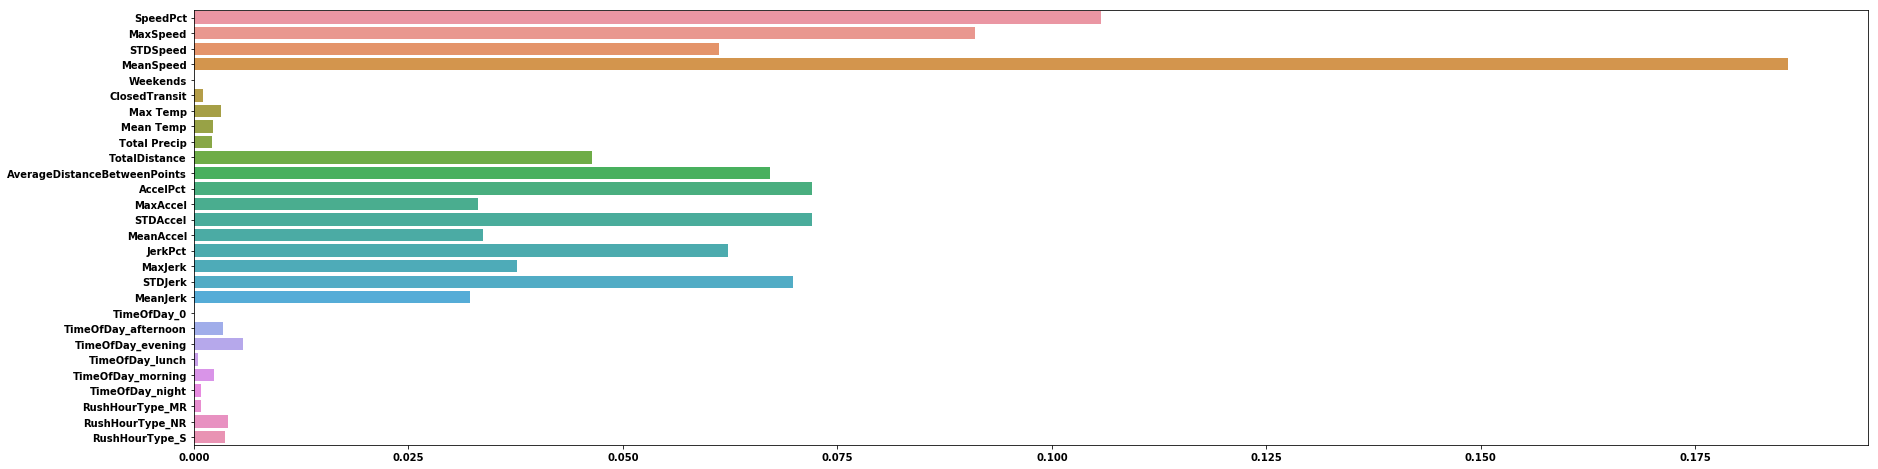

In [7]:
plt.figure(figsize=(30, 8))
sns.barplot(x=rf.feature_importances_, y=X_train.columns)

### Confusion Figure 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\ProgramData\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\abstract.py:115: RuntimeWarning: invalid value encountered in true_divide
  a = a.astype('float') / a.sum(axis=1)[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext])

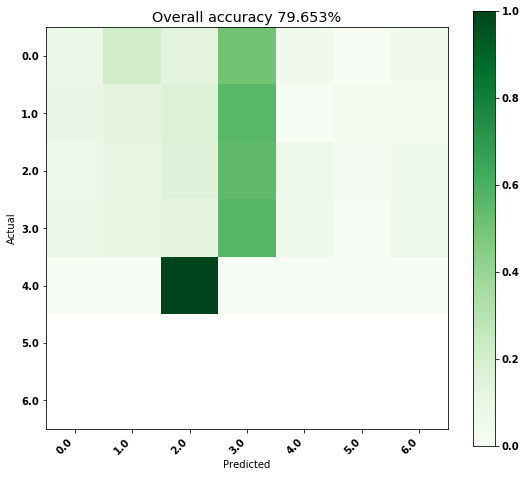

In [8]:
confusion(y_pred, y_test)